Metadata

* 'Property_ID', = Unique id of the property
* 'room',  No. of rooms available
* 'layout_type',  ['BHK' 'RK']
* 'property_type', = ['Apartment' 'Studio Apartment' 'Independent Floor' 'Independent House' 'Villa' 'Penthouse']
* 'locality',  = Overall Locality description
* 'price', = Rent in INR
* 'area', = in Square Feet
* 'furnish_type', ['Semi-Furnished' 'Furnished' 'Unfurnished']
* 'bathroom',: No. of Bathrooms
* 'city', : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune']
* 'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No
* 'floor',: Floor from 0 to 20
* 'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No
* 'power_backup', : 1 or 0  : 1 = Yes, 0 = No
* 'washing_machine',: 1 or 0  : 1 = Yes, 0 = No
* 'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No
* 'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No
* 'security_deposit', Amount of Security Deposit
* 'neighborhood', : Nearest Metro/Bus/Mall in meters
* 'CCTV/security : CCTV available 1 or 0  : 1 = Yes, 0 = No
* 'lift': 1 or 0  : 1 = Yes, 0 = No

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[14,8]

In [157]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [158]:
train = pd.read_csv('train_csv2022.csv')
test = pd.read_csv('test_csv2022.csv')

In [159]:
train.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156


In [160]:
train.shape, test.shape

((114480, 21), (20203, 20))

# Exploratory Data Analysis

In [161]:
data = pd.concat([train, test], axis=0)

In [162]:
data.shape

(134683, 21)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134683 entries, 0 to 20202
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  134

In [164]:
data.select_dtypes(np.number).columns

Index(['Property_ID', 'room', 'area', 'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

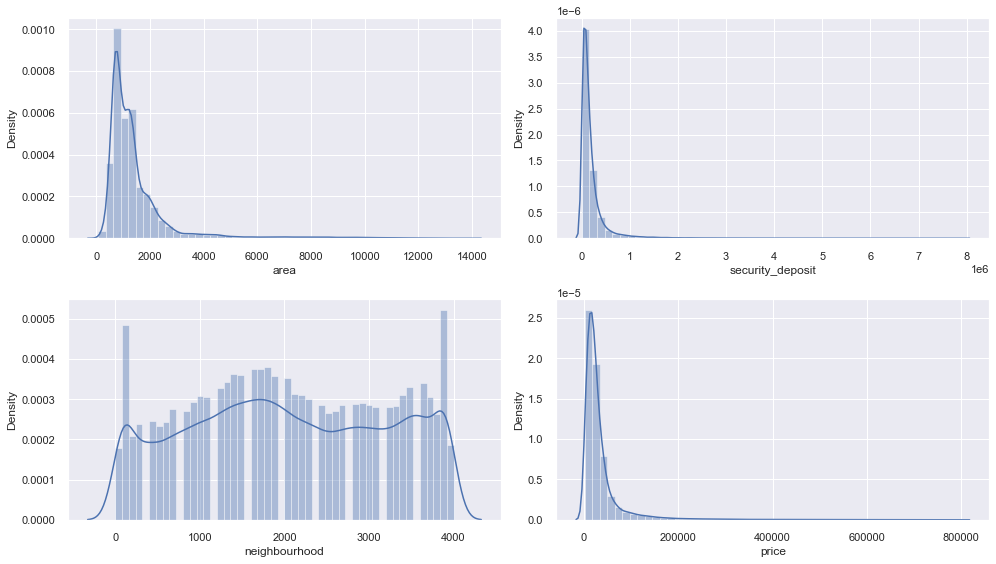

In [165]:
nums = ['area', 'security_deposit', 'neighbourhood','price']

a=2
b=2
c=1

for i in nums:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    c = c+1
    
plt.tight_layout()
plt.show()

In [166]:
# Cat Columns
data.select_dtypes(exclude = np.number).columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city'], dtype='object')

In [167]:
data.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

In [168]:
cols = ['room','layout_type', 'property_type',
       'bathroom','parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar','CCTV/security', 'lift', 'city']

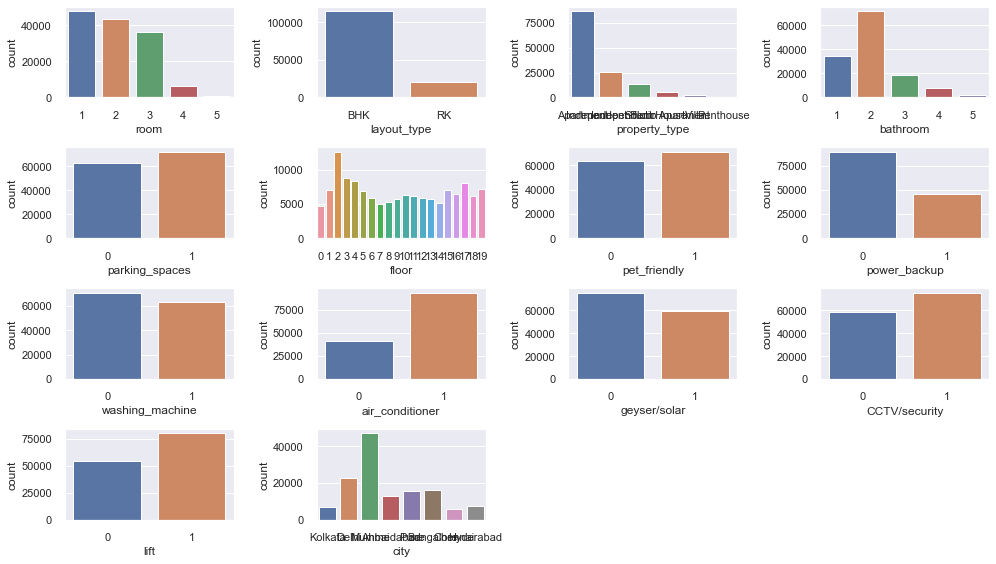

In [169]:
a=4
b=4
c=1

for i in cols:
    plt.subplot(a,b,c)
    sns.countplot(data[i])
    c = c+1
    
plt.tight_layout()
plt.show()

# Inference

* Most of Rentals are seen in Mumbai
* Most of the properties have lift followed by CCTV and AC
* Properties do not have geyser followed by less washing machines and no Power Back Up.
* Pet friendly Houses exists in the Data
* No. of bathroom range from 1 to 5
* Max Bedroom are 5 and therefore the house in the data are from 1BHK ti 5BHK
* Most of the rental houses are semi-furnished in nature
* the frequency of apartments are more than any other type of property in the dataset.
* People generally prefer Rentals on the 2nd floor 

In [170]:
# data missing values
data.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
dtype: int64

<AxesSubplot:xlabel='area', ylabel='price'>

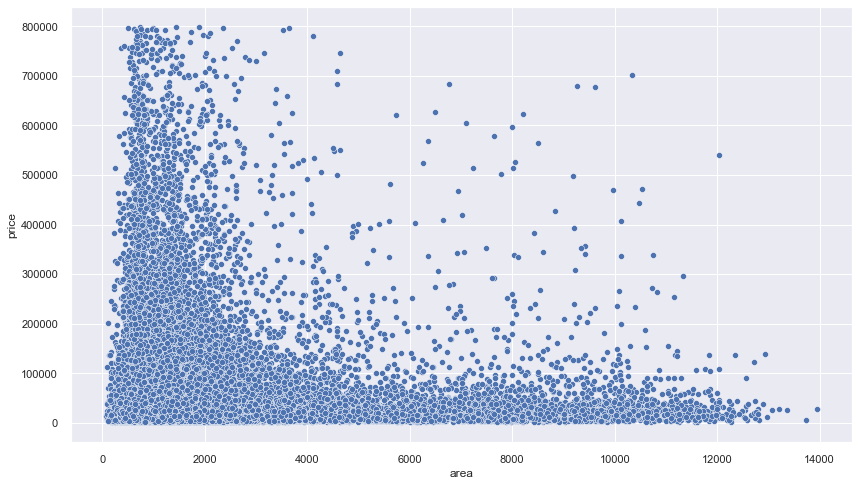

In [171]:
sns.scatterplot(x='area', y='price', data=data)

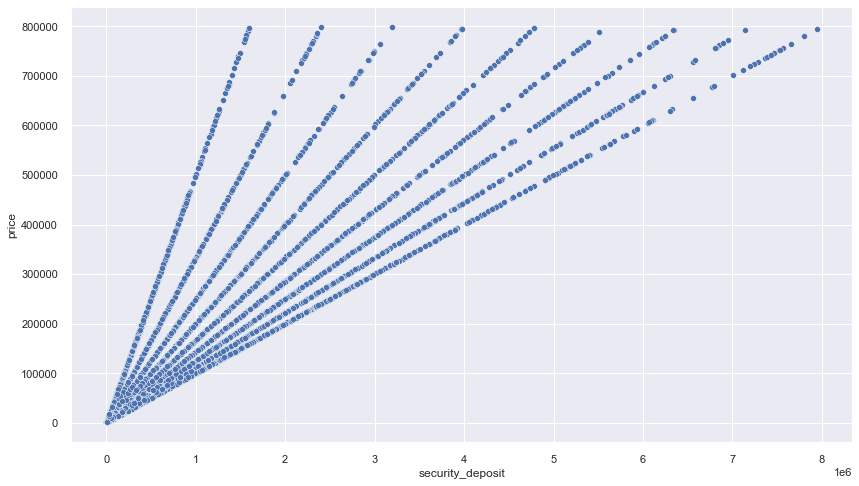

In [172]:
sns.scatterplot(x='security_deposit', y='price', data=data)
plt.show()

# Security deposit varies with the price

In [173]:
data.loc[:, ['security_deposit', 'price']].corr()

,security_deposit,price
security_deposit,1.000000,0.898108
price,0.898108,1.000000


<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

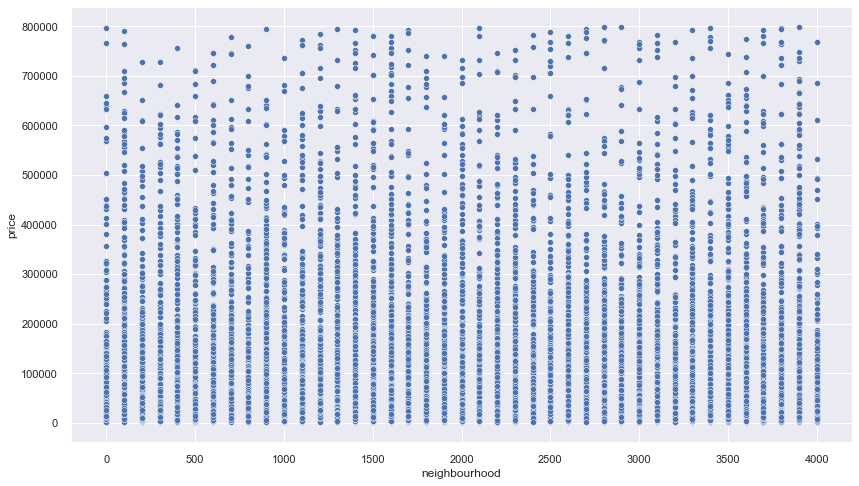

In [174]:
sns.scatterplot(x='neighbourhood', y='price', data=data)

In [175]:
# Convert distance into kms
data['neighbourhood'] = data['neighbourhood']/1000

In [176]:
def outcome(x):
    if (x<2):
        return('Near')
    else:
        return('Far')

In [177]:
data['Neighbour_Dist'] = data['neighbourhood'].apply(outcome)

In [178]:
data.groupby('Neighbour_Dist')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbour_Dist,,,,,,,,
Far,58127.0,36065.241867,62796.689464,1590.0,11518.0,20181.0,35101.5,799325.0
Near,56353.0,37371.730218,62751.642991,1624.0,12539.0,21579.0,36920.0,795827.0


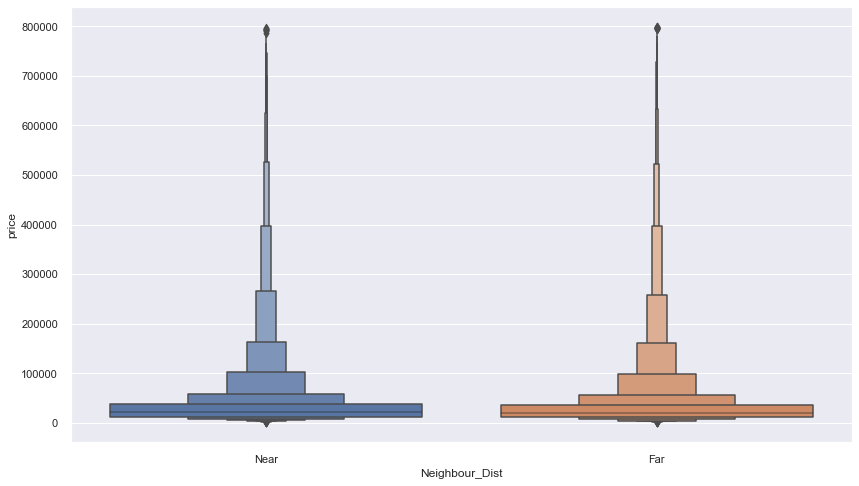

In [179]:
sns.boxenplot(x='Neighbour_Dist', y='price', data=data)
plt.show()

In [180]:
data.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price', 'Neighbour_Dist'],
      dtype='object')

In [181]:
# Convert the Features in Object

data['parking_spaces'] = data['parking_spaces'].astype('object')
data['floor'] = data['floor'].astype('object')
data['pet_friendly'] = data['pet_friendly'].astype('object')
data['power_backup'] = data['power_backup'].astype('object')
data['washing_machine'] = data['washing_machine'].astype('object')
data['air_conditioner'] = data['air_conditioner'].astype('object')
data['geyser/solar'] = data['geyser/solar'].astype('object')
data['CCTV/security'] = data['CCTV/security'].astype('object')
data['lift'] = data['lift'].astype('object')

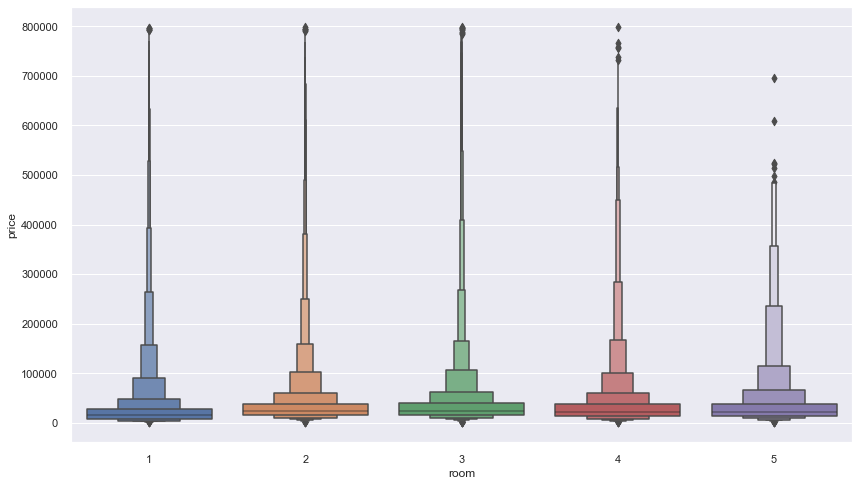

In [182]:
sns.boxenplot(x='room', y='price', data=data)
plt.show()

In [183]:
data.groupby('room')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room,,,,,,,,
1,40845.0,31351.664439,62920.219946,1590.0,7590.00,14960.0,28284.00,796196.0
2,36676.0,39149.798969,59908.024849,1620.0,15287.00,24075.5,38948.25,798219.0
3,30682.0,40439.010690,64584.066264,1808.0,15236.25,24192.0,39636.50,799325.0
4,5474.0,38602.748265,65713.860041,1698.0,13083.25,21931.5,37124.00,799123.0
5,803.0,42211.078456,73825.909714,2350.0,13365.50,22791.0,37702.50,696716.0


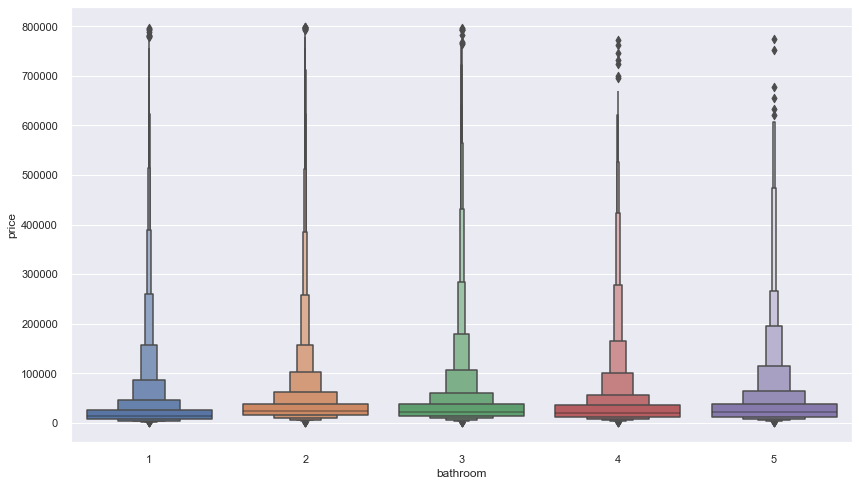

In [184]:
sns.boxenplot(x='bathroom', y='price', data=data)
plt.show()

In [185]:
data['room'] = data['room'].astype('object')
data['bathroom'] = data['bathroom'].astype('object')

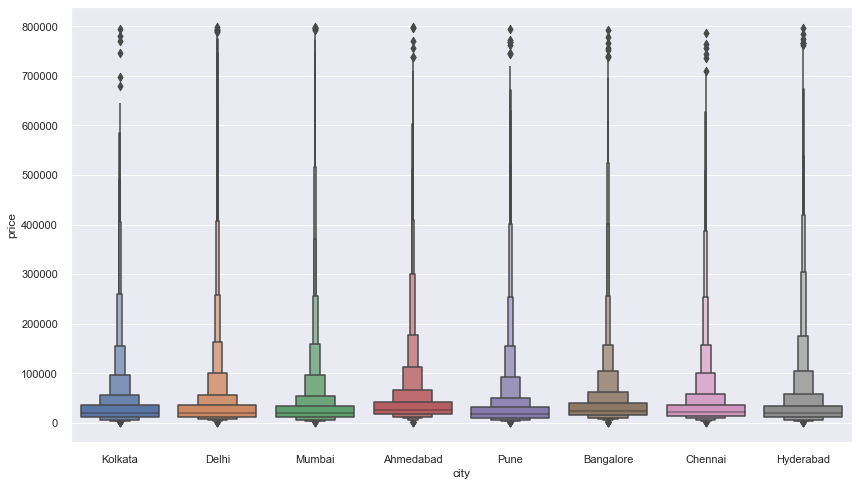

In [186]:
sns.boxenplot(x='city', y='price', data=data)
plt.show()

In [187]:
east = ['Kolkata']
north = ['Delhi']
west = ['Pune', 'Mumbai']
south = ['Bangalore', 'Chennai', 'Hyderabad']

In [188]:
def region(x):
    if x in north:
        return('North')
    if x in east:
        return('East')
    if x in west:
        return('West')
    else:
        return('South')

In [189]:
data['City_Cat'] = data['city'].apply(region)

In [190]:
data.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East


In [191]:
data.groupby('layout_type')['room'].describe()

,count,unique,top,freq
layout_type,,,,
BHK,114684,5,2,38418
RK,19999,5,1,9704


In [192]:
# Converting RK into BHK where the room > 1
data.loc[(data.layout_type=='RK') & (data.room>1), 'layout_type'] = 'BHK'

In [193]:
# Fixing the washrooms basis RK
data.loc[(data.layout_type=='RK') & (data.bathroom>1), 'bathroom'] = '1'

In [194]:
# Checking the unique locality in data 
data.locality.nunique()

3706

In [195]:
data.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North
2,120243,2,BHK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East


In [196]:
# Map the locality

encoded = train.groupby('locality')['price'].median()


In [197]:
data['locality'] = data.locality.map(encoded)

In [198]:
# Furnish type
furnishencoded = train.groupby('furnish_type')['price'].median()
data['furnish_type'] = data.furnish_type.map(furnishencoded)

In [199]:
# Frequency encoding for Floor
data['floor_encoded'] = data.floor.value_counts()/data.shape[0]

In [200]:
data.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat,floor_encoded
0,100361,4,BHK,Apartment,17264.0,805,21404.0,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East,0.035246
1,66785,2,BHK,Apartment,21215.0,1093,21404.0,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North,0.052620
2,120243,2,BHK,Independent Floor,20929.0,1227,16047.0,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West,0.093724
3,96487,1,BHK,Apartment,20678.0,1022,21404.0,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East,0.065814
4,95695,2,BHK,Apartment,20678.0,1403,23718.0,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East,0.061589


In [201]:
# Impute locality with dummy variable
data.locality.fillna(-9999, inplace=True)

In [202]:
# Drop the Variables
data.drop(['Property_ID', 'city', 'floor_encoded'], axis=1, inplace=True)

In [203]:
data.groupby('floor')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor,,,,,,,,
0,4031.0,38226.887869,64022.821530,1810.0,13424.00,22372.0,38164.50,782949.0
1,6041.0,37137.972852,65159.722254,1614.0,12177.00,20788.0,36027.00,796196.0
2,10804.0,35502.989263,64111.486726,1590.0,9893.00,18949.0,34543.00,798219.0
3,7533.0,34761.811762,63399.086911,1674.0,10271.00,19191.0,34263.00,780396.0
4,7046.0,35576.418393,61046.056676,1620.0,11019.50,20435.5,35522.50,792355.0
5,5893.0,36041.928559,59254.917307,1668.0,11889.00,20873.0,35793.00,756990.0
6,4946.0,37779.829357,61916.250196,1599.0,12696.75,21898.0,37452.50,787019.0
7,4203.0,36397.918630,60511.809365,1701.0,12700.00,21211.0,35866.50,799325.0
8,4495.0,36237.947275,62535.135661,1693.0,11594.00,21002.0,35290.00,799123.0


In [204]:
# Target encoding on floor
floor_encoded = train.groupby('floor')['price'].median()
data['Floor_encoded'] = data.floor.map(floor_encoded)

In [205]:
data.property_type.value_counts()

Apartment            86819
Independent Floor    25850
Independent House    13408
Studio Apartment      5723
Villa                 2391
Penthouse              492
Name: property_type, dtype: int64

In [206]:
# Replace the independent floor with house

data.replace(to_replace= 'Independent Floor', value= 'Independent House', inplace=True)

In [207]:
data.head()

,room,layout_type,property_type,locality,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_Dist,City_Cat,Floor_encoded
0,4,BHK,Apartment,17264.0,805,21404.0,2,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Near,East,19191.0
1,2,BHK,Apartment,21215.0,1093,21404.0,2,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Near,North,20321.0
2,2,BHK,Independent House,20929.0,1227,16047.0,2,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Near,West,18949.0
3,1,BHK,Apartment,20678.0,1022,21404.0,3,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East,21002.0
4,2,BHK,Apartment,20678.0,1403,23718.0,2,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Near,East,21211.0


In [208]:
data.loc[data.layout_type=='RK', 'property_type'].value_counts()

Apartment            5278
Independent House    3292
Studio Apartment      791
Villa                 289
Penthouse              54
Name: property_type, dtype: int64

In [209]:
# Replace Penthouse in Studio
data.loc[(data.layout_type=='RK') & (data.property_type=='Penthouse'), 'property_type'] = 'Studio Apartment'

In [210]:
# Replace Villa in Studio
data.loc[(data.layout_type=='RK') & (data.property_type=='Villa'), 'property_type'] = 'Studio Apartment'

In [211]:
# Bathroom into integer
data['bathroom'] = data['bathroom'].astype('int')

In [212]:
data.drop('floor', axis=1,inplace=True)

In [213]:
final_data = pd.get_dummies(data, drop_first=True)

In [214]:
final_data.shape

(134683, 26)

In [215]:
final_data.head()

,room,locality,area,furnish_type,bathroom,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Floor_encoded,layout_type_RK,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Neighbour_Dist_Near,City_Cat_North,City_Cat_South,City_Cat_West
0,4,17264.0,805,21404.0,2,1,0,0,0,1,0,33012,0,0,1.5,4716.0,19191.0,0,0,0,0,0,1,0,0,0
1,2,21215.0,1093,21404.0,2,1,0,0,0,1,0,74907,1,1,0.3,24969.0,20321.0,0,0,0,0,0,1,1,0,0
2,2,20929.0,1227,16047.0,2,0,0,0,0,0,0,217314,1,0,1.3,24146.0,18949.0,0,1,0,0,0,1,0,0,1
3,1,20678.0,1022,21404.0,3,0,1,0,0,1,0,217560,1,1,3.6,36260.0,21002.0,0,0,0,0,0,0,0,0,0
4,2,20678.0,1403,23718.0,2,0,1,1,1,1,0,704624,1,1,0.2,176156.0,21211.0,0,0,0,0,0,1,0,0,0


In [216]:
train.shape, test.shape

((114480, 21), (20203, 20))

In [217]:
newtrain = final_data.iloc[0:train.shape[0], :]
newtest = final_data.iloc[train.shape[0]:, :]

In [218]:
newtrain.shape, newtest.shape

((114480, 26), (20203, 26))

# Statistic and Unsupervised Machine Learning

In [219]:
newtrain.head()

,room,locality,area,furnish_type,bathroom,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Floor_encoded,layout_type_RK,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Neighbour_Dist_Near,City_Cat_North,City_Cat_South,City_Cat_West
0,4,17264.0,805,21404.0,2,1,0,0,0,1,0,33012,0,0,1.5,4716.0,19191.0,0,0,0,0,0,1,0,0,0
1,2,21215.0,1093,21404.0,2,1,0,0,0,1,0,74907,1,1,0.3,24969.0,20321.0,0,0,0,0,0,1,1,0,0
2,2,20929.0,1227,16047.0,2,0,0,0,0,0,0,217314,1,0,1.3,24146.0,18949.0,0,1,0,0,0,1,0,0,1
3,1,20678.0,1022,21404.0,3,0,1,0,0,1,0,217560,1,1,3.6,36260.0,21002.0,0,0,0,0,0,0,0,0,0
4,2,20678.0,1403,23718.0,2,0,1,1,1,1,0,704624,1,1,0.2,176156.0,21211.0,0,0,0,0,0,1,0,0,0


In [220]:
# Num vars
cols = ['locality', 'furnish_type', 'area', 'security_deposit', 'Floor_encoded']

In [221]:
localdata = newtrain.loc[:, cols]

In [222]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans

model= KMeans(random_state= 42)
visual = KElbowVisualizer(estimator= model, k=(2,10))

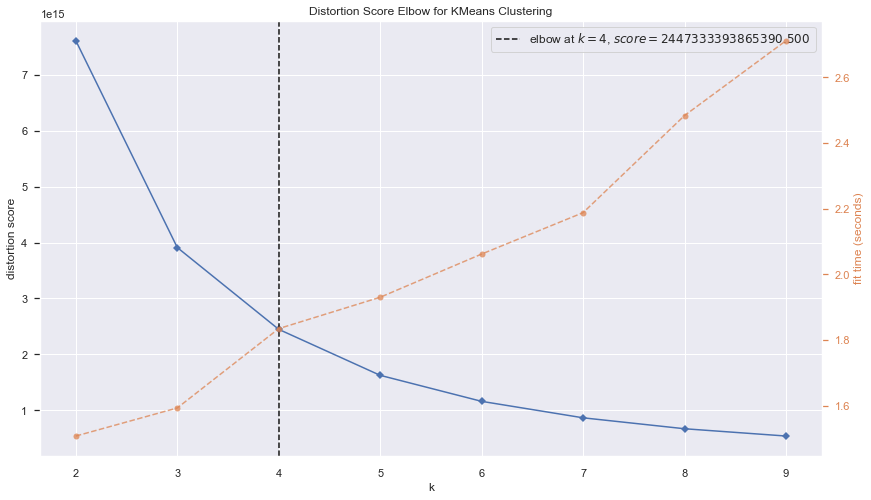

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [223]:
visual.fit(localdata)
visual.show()

In [224]:
# Fit the cluster model

kmeans = KMeans(n_clusters=4, random_state= 42)
newtrain['cluster'] = kmeans.fit_predict(localdata)

In [225]:
# Apply the Anova to sheck the significance of the Cluster Generated

# Ho: That the cluster Lavels have no significance wrt target
# Ha: That the cluster labels have significance wrt target

from statsmodels.formula.api import ols
olsmodel = ols('price~cluster', data=newtrain).fit()

# Print Anova table

from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))

                df        sum_sq       mean_sq           F  PR(>F)
cluster        1.0  2.464058e+13  2.464058e+13  6613.45662     0.0
Residual  114478.0  4.265249e+14  3.725824e+09         NaN     NaN


In [226]:
cols = ['locality', 'furnish_type', 'area', 'security_deposit', 'Floor_encoded', 'neighbourhood']

localtest = newtest.loc[:, cols]

kmeans = KMeans(n_clusters=4, random_state= 42)
newtest['cluster'] = kmeans.fit_predict(localtest)

# Model Building

* 1.Base Model-Avg of Price

In [227]:
pred = train.price.mean()

In [228]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':pred})
submission.to_csv('Basemodel.csv', index=False)

## Decision Tree

In [229]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

In [230]:
xtrain = newtrain.drop('price', axis=1)
ytrain= newtrain.price

In [231]:
newtest.drop('price', axis=1, inplace=True)

In [232]:
dt_model = dtree.fit(xtrain, ytrain)

In [233]:
y_pred = dt_model.predict(newtest)

In [234]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':y_pred})
submission.to_csv('Decisiontree.csv', index=False)

In [235]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(random_state= 494)

In [236]:
lgb_model = lgb.fit(xtrain, ytrain)

In [237]:
y_pred1 = lgb_model.predict(newtest)

In [238]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':y_pred1})
submission.to_csv('lgbmodel.csv', index=False)

In [239]:
lgb1 = LGBMRegressor(num_leaves=5, max_depth=10,n_estimators=500,learning_rate=0.01,random_state= 42)

In [240]:
lgb_model1 = lgb1.fit(xtrain, ytrain)

In [241]:
y_pred2 = lgb_model1.predict(newtest)

In [242]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':y_pred2})
submission.to_csv('lgbmodel2.csv', index=False)

In [243]:
from sklearn.ensemble import GradientBoostingRegressor

In [244]:
gb = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, n_estimators= 100, subsample= 0.9)

In [245]:
gb_model = gb.fit(xtrain, ytrain)

In [246]:
y_pred9 = gb_model.predict(newtest)

In [248]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':y_pred9})
submission.to_csv('GBmodel9.csv', index=False)

In [120]:
gb1 = GradientBoostingRegressor(learning_rate= 0.03, max_depth= 10, n_estimators= 100, subsample= 0.1)

In [127]:
from sklearn.metrics import mean_squared_error

In [147]:
GBR = GradientBoostingRegressor()

In [148]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
            'subsample'    : [0.9, 0.5, 0.2, 0.1],
            'n_estimators' : [100,500,1000, 1500],
            'max_depth'    : [4,6,8,10] }

In [149]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(xtrain, ytrain)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [150]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [151]:
gb5 = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, n_estimators= 100, subsample= 0.9)

In [153]:
gb_model5 = gb5.fit(xtrain, ytrain)

In [154]:
y_pred5 = gb_model5.predict(newtest)

In [155]:
submission = pd.DataFrame({'Property_ID': test.Property_ID,
                        'price':y_pred5})
submission.to_csv('GBmodel5.csv', index=False)